In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

# 2. 데이터와 표본분포

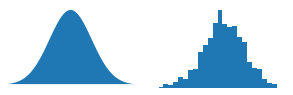

In [2]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

# 왼쪽: 모집단 / 오른쪽 : 표본 데이터
# 왼쪽에서 오른쪽을 얻어내는 것이 표본 추출
# 전통적인 통계학에서는 강력한 가정에 기초한 이론을 통해 왼쪽의 모집단을 밝혀내는 데 초점을 맞춤
# 현대 통계학에서는 이러한 가정이 더는 필요하지 않은 오른쪽 표본에 대한 연구로 방향이 옮겨지기 시작함

일반적으로 데이터 과학은 표본추출 과정과 주어진 데이터에 집중할 필요가 있음

예외) 모델링 가능한 물리적 과정을 통해 데이터가 생성되기도 함
- 동전 뒤집기: 실제 생활에서 겪는 모든 이항 상황(구매하거나 안하거나, 클릭하거나 안하거나 등)은 동전 뒤집기 모델로 설명이 가능함

-> 이런 경우 모집단에 대한 이해를 바탕으로 추가적인 통찰을 얻을 수 있음

## 2.1 임의표본추출과 표본편향

- 임의표본추출(임의표집, 랜덤표본추출): 대상이 되는 모집단 내의 선택 가능한 원소들을 무작위로 추출하는 과정(각 추첨에서 모든 원소는 동일한 확률로 뽑힘)
- 단순임의표본: 임의표본추출로 얻은 샘플
- 복원추출(with replacement): 다음 추첨에서 중복 추출이 가능하도록 해당 샘플을 다시 모집단에 포함시키는 방식
- 비복원추출(without replacement): 한번 뽑힌 원소는 추후 추첨에 사용하지 않는 방식
- 데이터 품질
    - 완결성(데이터 무결성, data integrity: 데이터의 라이프 사이클동안 모든 데이터가 얼마나 완전하고 일관되고 정확한지를 나타내는 정도)
    - 형식의 일관성
    - 깨끗함
    - 각 데이터 값의 정확성
    - 통계학에선 대표성(representativeness, 모집단(전체집단)의 특성을 알기 위한 추론 시 모집단의 일부로 구성된 표본이 모집단을 대표할 수 있는 정도)이라는 개념을 추가함
- 표본(sample): 더 큰 데이터 집합(모집단)으로부터 얻은 데이터의 부분집합
- 모집단(population): 어떤 데이터 집합을 구성하는 전체 대상 혹은 전체 집합
- N(n): 모집단(표본)의 크기
- 층화표본추출(층화표집, stratified sampling): 모집단을 층으로 나눈 뒤, 각 층에서 무작위로 표본을 추출하는 방식
- 계층(stratum): 공통된 특징을 가진 모집단의 동종 하위 그룹(복수형: strata)
- 편향(bias): 계통상의 오류
- 표본편향(sample bias): 모집단을 잘못 대표하는 표본

- $μ$: 모집단의 평균, $\bar{x}$: 표본 평균 -> 표본에 대한 정보는 관찰을 통해 얻어지고, 모집단에 대한 정보는 주로 작은 표본들로부터 추론함

## 2.2 선택편향

- 선택편향(selection bias): 관측 데이터를 선택하는 방식(의식적이든 무의식적이든) 때문에 생기는 편향
- 데이터 스누핑(data snooping): 뭔가 흥미로운 것을 찾아 광범위하게 데이터를 살피는 것
- 방대한 검색 효과(vast search effect): 중복 데이터 모델링이나 너무 많은 예측변수를 고려하는 모델링에서 비롯되는 편향 혹은 비재현성

빅데이터를 반복적으로 조사하는 것은 중요함 -> 선택편향에 대해 조심해야 함

방대한 검색 효과: 큰 데이터 집합을 가지고 반복적으로 다른 모델을 만들고 다른 질문을 하다 보면 언젠가 흥미로운 것을 발견하기 마련임 -> 이게 정말 의미 있는 것임? 아니면 우연히 얻은 예외 경우임?

방대한 검색 효과 외에도, 통계에서 일반적으로 나타나는 선택편향
- 비임의표본추출
- 데이터 체리 피킹(선별, 체리 피킹(cherry picking)은 어떤 회사의 제품이나 서비스 가운데 비용 대비 효율이 뛰어나거나 인기 있는 특정 요소만을 골라 합리적으로 소비하려는 현상을 가리키는 경제 용어임)
- 특정한 통계적 효과를 강조하는 시간 구간 선택
- 흥미로운 결과가 나올 때 실험을 중단하는 것 

성능을 검증하기 위해 둘 이상의 홀드아웃(holdout) 셋을 이용하기

데이터 마이닝 모델에서 제시하는 예측들을 검증하기 위해 목푯값 섞기(target shuffling, 본질적으로는 순열 검정)를 추천함

순열검정(permutaion test): 두 개 이상의 표본을 함께 결합하여 관측값들을 무작위로(또는 전부를)재표본으로 추출하는 과정

### 2.2.1 평균으로의 회귀(regression to the mean, 여기서 회귀는 '돌아간다'라는 뜻임. 통계적 모델링 방법의 회귀가 아님)

어떤 변수를 연속적으로 측정했을 때 예외적인 경우가 관찰되면 그다음에는 중간 정도의 경우가 관찰되는 경향이 있음

## 2.3 통계학에서의 표본분포

- 표본통계량(sample statistic): 모집단에서 추출된 표본 데이터들로부터 얻은 측정 지표
- 데이터 분포(data distribution): 어떤 데이터 집합에서의 각 개별 값의 도수분포(데이터 집합의 개별 값의 분포)
- 표본분포(sampling distribution): 여러 표본들 혹은 재표본들로부터 얻은 표본통계량 도수분포(하나의 모집단의 여러 샘플의 분포)
- 중심극한정리(central limit theorem): 표본크기가 커질수록 표본분포가 정규분포를 따르는 경향
- 표준오차(standard error): 여러 표본들로부터 얻은 표본통계량의 변량(개별 데이터 값들의 변량을 뜻하는 표준편차와 혼동하지 말것)
    - 변량: 통계에서, 조사 내용으로서의 특성을 수량으로써 나타낸 것. 신장·체중 등처럼 구간내 값을 연속적으로 취할 수 있는 '연속 변량'과, 득점 따위에서처럼 분리된 값밖에 취하지 못하는 이산 변량'이 있음

일반적으로 표본통계량으로 어떤 것을 측정하거나 뭔가를 모델링하기 위해 표본을 뽑음 -> 표본을 통해 추정이나 모델링을 하기 때문에 오류가 있을 수 있음 -> 다른 표본을 뽑았다면 결과가 다를 수 있음 -> 표본에 따라 결과가 얼마나 달라질지에 관심이 있음 -> 표본의 변동성(sampling variability)

In [3]:
loans_income = pd.read_csv('./data/loans_income.csv').squeeze('columns')

# 데이터에서 단순히 1000개 값으로 이뤄진 표본
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

# 5개 값의 평균 1000개로 이뤄진 표본
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

# 20개 값의 평균 1000개로 이뤄진 표본
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


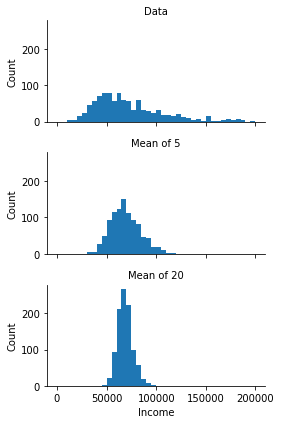

In [4]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

# 평균과 같은 표본통계량의 분포는 데이터 자체의 분포보다 규칙적이고 종 모양일 가능성이 높음(표본이 클수록 가능성 더 높음)
# 표본이 클수록 표본통계량의 분포가 좁아짐(아래 그림에서 n=5일 때보다 n=20일 때 더 좁고 종모양임)

### 2.3.1 중심극한정리

위에서 설명한 현상을 중심극한정리라 함 -> 모집단이 정규분포가 아니더라도 표본 크기가 충분히 크고 데이터가 정규성을 크게 이탈하지 않는 경우 여러 표본에서 추출한 평균은 종모양의 정규분포를 따름 -> 중심극한정리 덕분에 추론을 위한 표본분포, 즉 신뢰구간이나 가설검정을 계산하는 데 t 분포 같은 정규근사 공식을 사용할 수 있음

- 정규성(normally): 통계학에서 가설검정이 정규분포를 따른다는 성질을 전제하는 주요한 가정들중 하나
- 가설검정(hypothesis test): 가설 검정은 데이터의 표본이 제공하는 증거에 따라 모집단에 대한 주장을 받아들일지 또는 기각할지 여부를 지정하는 규칙임. 가설 검정은 귀무 가설과 대립 가설 등, 모집단에 대해 반대되는 두 가지 가설을 조사함. 귀무 가설은 검정되는 진술임.
- 신뢰구간(confidence interval): 모수가 어느 범위 안에 있는지를 확률적으로 보여주는 방법
- t 분포: t 분포는 모집단 표준편차를 알 수 없을 때 표본 평균과 모집단 평균 사이 표준화된 거리를 설명하며, 관측값은 정규 분포를 따르는 모집단에서 추출됨

### 2.3.2 표준오차

표준오차(standard error): 통계에 대한 표본분포의 변동성을 한마디로 말해주는 단일 측정 지표
$$ SE = \frac{s}{\sqrt{n}} $$
- s: 표본 값들의 표준편차
- n: 표본 크기
- 표준오차를 반으로 줄이려면 표본 크기를 4배 증가시켜야 함

## 2.4 부트스트랩

부트스트랩: 통계량이나 모델 파라미터(모수, 통계학에서 모 평균, 모 표준 편차, 모 분산 등 모집단의 데이터)의 표본분포를 추정하는 쉽고 효과적인 방법은 현재 있는 표본에서 추가적으로 표본을 복원추출하고 각 표본에 대한 통계량과 모델을 다시 계산하는 것임(현대 통계에서 부트스트랩은 표준오차를 추정하는 표준 방법임), 데이터나 표본통계량이 정규분포를 따라야 한다는 가정은 꼭 필요하지 않음

- 부트스트랩 표본(bootstrap sample): 관측 데이터 집합으로부터 얻은 `복원추출` 표본
- 재표본추출(재표집, 리샘플링, resampling): 관측 데이터로부터 반복해서 표본추출하는 과정. 부트스트랩과 순열(셔플링) 과정을 포함함

1. 샘플 값을 하나 뽑아서 기록하고 제자리에 놓는다.
2. n번 반복한다.
3. 재표본추출된 값의 평균을 기록한다.
4. 1~3단계를 R번 반복한다.
5. R개의 결과를 사용하여 표준편차(표본평균의 표준오차) 계산, 히스토그램(또는 상자그림) 그리기, 신뢰구간 찾기

개념적으로 부트스트랩은 표본을 수천, 수백만 번 복제하는 것 -> 이를 통해 원래 표본으로부터 얻어지는 모든 정보를 포함하는 가상 모집단을 얻게 됨 -> 이 가상 모집단으로부터 표본분포를 추정할 목적으로 표본을 수집할 수 있음

부트스트랩은 다변량 데이터에도 적용될 수 있음 -> 각 행은 여러 변수들의 값을 포함하는 하나의 샘플을 의미

여러 부트스트랩 샘플을 가지고 트리를 여러 개 만든 다음 각 트리에서 나온 예측값을 평균 내는 것이 일반적으로 단일 트리를 사용하는 것보다 효과적임 -> 이러한 프로세스가 `배깅`

- 부트스트랩은 표본 크기가 작은 것을 보완하기 위한 것이 아님
- 부트스트랩은 새 데이터를 만드는 것도 아님
- 부트스트랩은 기존 데이터 집합의 빈 곳을 채우는 것도 아님
- 부트스트랩은 모집단에서 추가적으로 표본을 뽑을 때 그 표본이 원래 표본과 얼마나 비슷할지를 알려줄 뿐임!!

In [5]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

# 중간값의 원래 추정치: 62,000달러
# 부트스트랩 분포는 추정치에서 약 -70달러의 편향이 있고 약 213달러의 표준오차가 있는 것으로 나타남

Bootstrap Statistics:
original: 62000.0
bias: -82.09799999999814
std. error: 228.73933106830748


## 2.5 신뢰구간

- 신뢰수준(confidence level): 통계에서 어떠한 값이 알맞은 추정값이라고 믿을 수 있는 정도. 보통은 95%의 신뢰도를 사용함.
- 구간끝점(interval endpoint): 신뢰구간의 최상위, 최하위 끝점
- 표본크기 n과 관심 있는 표본통계량이 주어졌을 때, 부트스트랩 신뢰구간을 구하는 법
    1. 데이터에서 복원추출 방식으로 크기 n인 표본을 뽑는다(재표본추출).
    2. 재표본추출한 표본에 대해 원하는 통계랑을 기록한다.
    3. 1~2단계를 R번 반복한다.
    4. $x\%$ 신뢰구간을 구하기 위해, R개의 재표본 결과의 분포 양쪽 끝에서 $[(100-x)/2]\%$만큼 잘라낸다.
    5. 절단한 점들은 $x\%$ 부트스트랩 신뢰구간의 양 끝점이다.

68760.51844
55734.1


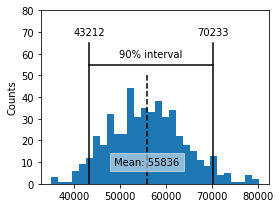

In [6]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

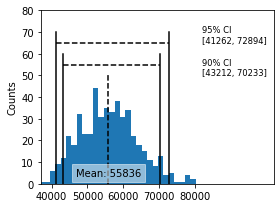

In [7]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

## 2.6 정규분포

- 오차(error): 데이터 포인트와 예측값 혹은 평균 사이의 차이
- 표준화(정규화)하다(standardize): 평균을 빼고 표준편차로 나눔
- z 점수(z-score): 개별 데이터 포인트를 정규화한 결과(데이터를 z점수로 변환 = 데이터를 표준화 = 데이터를 정규화)
- 표준정규분포(standard normal distribution): 평균=0, 표준편차=1인 정규분포
- QQ 그림(QQ-plot): 표본분포가 특정 분포에 얼마나 가까운지를 보여주는 그림

정규분포에서 데이터의 68%는 평균의 표준편차 내(µ ± σ)에 속하며 95%는 표준편차 두 배수 내(µ ± 2σ)에 있음. 99.7%는 µ ± 3σ

실제로 사용되는 대부분의 원시 데이터는 전반적으로 정규분포를 따르지 않음 -> 표본분포에서 대부분의 통계량이 정규분포를 따름 -> 일반적으로 정규분포 가정은 경험적 확률분포나 부트스트랩 분포를 구할 수 없는 경우 사용되는 최후의 수단임

### 2.6.1 표준정규분포와 QQ 그림

표준화: 기준점을 동일하게 맞춰 조사자가 자료들을 쉽게 비교할 수 있도록 만드는 과정 -> 대표적인 표준화 분포인 표준정규분포(z분포)는 평균을 0, 표준편차를 1로 만듦

QQ 그림은 표본이 특정 분포에 얼마나 가까운지를 시각적으로 판별하는 데 사용됨
- y축: 각 값의 z 점수
- x축: 정규분포에서의 해당 분위수(분위수란 데이터의 분포에서 전체 넓이를 일정 비로 나누어 위치에 있는 값) -> 점들이 대각선 위에 놓이면 표본분포가 정규분포에 가까운 것으로 간주할 수 있음
    - 정규분포의 분위수: https://www.mittag-statistik.de/app_kr/quantiles/standardnormal.html

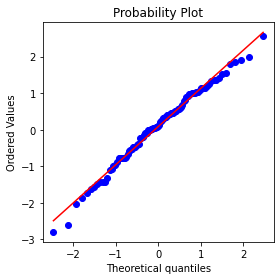

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

# 표준정규분포로부터 추출한 100개 표본의 QQ 그림

## 2.7 긴 꼬리 분포

- 꼬리(tail): 적은 수의 극단값이 주로 존재하는 도수분포의 길고 좁은 부분
- 왜도(skewness): 분포의 한쪽 꼬리가 반대쪽 다른 꼬리보다 긴 정도

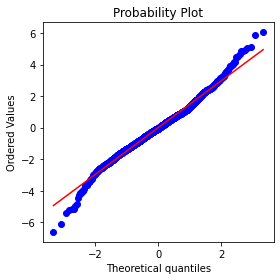

In [9]:
sp500_px = pd.read_csv('./data/sp500_data.csv')

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

# 넷플릭스의 일일 주식 수익률에 대한 QQ 그림
# 위 표준정규분포의 QQ그림과는 꼬리 부분에서 다름 -> 정규분포 아님

## 2.8 스튜던트의 t 분포

t 분포는 정규분포와 생김새가 비슷하지만, 꼬리 부분이 약간 더 두껍고 긺 -> t 분포는 표본통계량의 분포를 설명하는 데 광범위하게 사용됨 -> 표본평균의 분포는 일반적으로 t 분포와 같은 모양이며, 표본크기에 따라 다른 계열의 t 분포가 있음 -> 표본이 클수록 더 정규분포를 닮은 t 분포가 형성됨

t분포는 표본평균 $\bar{X}$의 표준화 식에서 모표준편차 $σ$를 표본표준편차 $s$로 대체한 것이다.

만약 모표준편차를 안다면 표본평균을 표준화한 표준정규분포로 모평균을 추측하는 것이 더욱 정확하다. 그러나 일반적으로 모표준편차를 잘 알지 못한다. 왜냐하면 모평균을 정확히 모르는데 모표준편차는 안다는 것 자체도 이상하거니와 모집단 전부를 조사하기란 현실적으로 어렵기 때문이다. 따라서 모표준편차 대신 표본표준편차의 값을 이용한 t분포로 모평균을 추측하는 것이다.

표본평균, 두 표본평균 간의 차이, 회귀 파라미터, 그 외 다른 통계량들의 분포를 구할 때 t 분포를 사용

## 2.9 이항분포

- 이항시행(binomial trial): 두 가지 결과를 가져오는 시행(유의어: 베르누이 시행)
- 이항분포(binomial distribution): n번 시행에서 성공한 횟수에 대한 분포(유의어: 베르누이 분포)

In [10]:
# 성공 확률 = 0.1, size = 5, 2번 성공 or 2번 이하의 성공
print(stats.binom.pmf(2, n=5, p=0.1)) # pmf
print(stats.binom.cdf(2, n=5, p=0.1)) # cdf

# pmf(probability mass function, 확률 질량 함수): 이산 확률 변수에서 특정 값에 대한 확률을 나타내는 함수
# cdf(cumulative distribution function, 누적 분포 함수): 주어진 확률 변수가 특정 값보다 작거나 같은 확률을 나타내는 함수
# pdf(probability density function, 확률 밀도 함수): 연속 확률 변수의 분포를 나타내는 함수

0.07289999999999995
0.99144


## 2.10 카이제곱분포

- 기댓값: 어떤 확률 과정을 무한히 반복했을 때, 얻을 수 있는 값의 평균으로서 기대할 수 있는 값
- 카이제곱통계량: 관측 데이터가 특정 분포에 `적합`한 정도를 나타냄(적합도 검정), 여러 처리('A/B/C...검정')의 효과가 서로 다른지 여부를 결정하는 데 유용함
    - "남성과 여성, 성별로 보수 성향과 진보 성향의 비율에 유의한 차이가 있는가" 등의 검증을 할 때 쓸 수 있다. p-값이 0.05(5%)보다 작으면 유의한 차이가 있다고 생각할 수 있다.
    - 카이제곱 값이 높은 것은 기대한 것과 현저하게 다르다는 것을 의미
- 카이제곱분포: 귀무 모델에서 반복적으로 재표본추출한 통계량 분포


추정의 논리를 본격적으로 도입하기 전에, 검정이라는 것은 모집단에 대한 어떤 썰을 지지해야 할지 말아야 할지 판단하는 과정임에 주목해야 한다. 이것은 곧 "먼저 썰이 있었고, 그 다음에 검정이 있다" 의 의미라고도 할 수 있으며, 위의 추정과는 달리 모집단에 대해 무언가를 주장할 수 있는 최소한의 정보가 이미 주어져 있는 상황을 전제한다. 또한 그 썰들이 참이냐 거짓이냐를 객관적으로 확인해 볼 수 있는 검정 가능한(testable) 속성을 가짐도 암시한다. 덮어놓고 다짜고짜 "한국인은 똑똑하다" 같은 주장을 한다고 해도, 그것은 검정할 수 없는 자의적인 주장이다. 이 주장을 검정할 수 있도록 만들려면, "한국인의 평균 IQ는 105 이상이다" 처럼 비교 가능한 기준점을 세우거나(단일집단 검정), "한국인의 평균 IQ는 미국인의 평균 IQ보다 높다" 처럼 비교 가능한 집단을 설정해야 한다(두 집단 검정). 그래야만 통계적으로 평균을 계산해 보고 추정의 논리에 비추어 보아 그 주장을 지지할지 말지 결정할 수 있는 것이다.

이처럼 우리의 관심이 되는 대상에 대한 어떤 정보를 진술하면서도 통계적인 비교가 가능한 주장을 가설(hypothesis)이라고 한다. 문제는, 모든 가설이 다 같지는 않아서, 어떤 가설은 그것을 믿어도 됨을 주장하는 부담이 큰 반면, 어떤 가설은 그런 부담이 적다는 것이다. 예컨대 어떤 사람이 "모든 백조는 희다" 를 주장한다면, 그 가설이 옳은지 보려면 세상에 존재하는 모든 백조들을 전부 뒤져봐야 한다. 하지만 "모든 백조가 다 흰 것은 아니다" 를 주장한다면, 그 가설은 단 하나의 검은 백조만 들이대면 곧바로 믿을 수 있게 된다. 그렇다면, 어느 종류의 가설을 디폴트로 놓고 검정을 시행하는 것이 속 편할까? 학자들은 `증명의 부담이 큰 쪽을 디폴트로 놓음(공격당하기 어려운 쪽)`으로써 증명의 부담이 작은 주장들에게 공격당할 수 있도록 했다. 그래서 공격이 성공하면 이를 영가설을 대신하는 새로운 정보로 삼고, 실패하면 기존의 디폴트 가설을 버리지 않았다. 이렇게 한다면 세상에 대한 인류의 지식이 축적되고 정교화될 수 있는 것이다.

위에서 `'디폴트 가설' 이라고 표현했던, 증명의 부담이 큰 가설을 귀무 가설 혹은 영가설(H0; null hypothesis)`이라고 한다. 디폴트의 위치에 있기 때문에 영가설은 관습적이고 보수적이며, 그것을 채택한다고 해서 이상한 사람 취급을 받지는 않는다. 쉽게 말해, 잘 모르겠다면 영가설 쪽을 지지하는 것이 안전하다. 영가설은 그 주장에 '동일하다(＝)', '차이가 없다', '존재하지 않는다', '효과가 없다', '새롭지 않다', '변화가 없다' 등의 내용이 포함되는 모든 가설이다. 영가설은 참일 수도 있고 거짓일 수도 있으나, 관행적으로 참이라고 받아들여져 왔다(accepted as true). 이는 `영가설을 직접적으로 검정하기가 쉽지 않기 때문이며, 대립가설이 나타나게 되면 그때 비로소 간접적으로 검정의 대상이 된다.`

반대로 위에서 `증명의 부담이 작다고 설명한 가설을 연구 가설 혹은 대립가설(H1; Ha; alternative hypothesis)`이라고 한다. 영가설과는 달리, 대립가설은 지금까지 알려지지 않았던 새로운 주장에 속하고, 따라서 그 존재 자체로 새로운 검정을 촉발시킨다. 그 모집단에 대해 잘 알고 있는 연구자가 아니라면, 잘 모르는 상황에서 대립가설을 지지하는 것은 위험하다. 대립가설은 그 주장에 '동일하지 않다(≠)', '차이가 있다(＜,＞)', '존재한다', '효과가 있다', '새로운 무엇이다', '변화했다' 등의 내용이 포함되는 모든 가설이다. 대립가설도 마찬가지로 참일 수도 있고 거짓일 수도 있으나, 일단은 참일 수도 있다(might be true)고 간주된다. 대립가설은 주장의 부담이 작지만 그만큼 쉽게 무너지기도 하며, 대립가설이 힘을 잃으면 우리는 "영가설을 기각할 이유가 없다" 고 판단하여 다시 영가설로 되돌아간다.

영가설과 대립가설은 논리적으로 상호배타적이며 포괄적인 관계에 있다. 즉 영가설을 기각한다는 것은 곧 대립가설을 자동으로 채택한다는 말이 되며(상호배타성), 영가설과 대립가설 양쪽 모두가 포함시키지 못하는 경우는 존재하지 않는다(포괄성). 그래서 만약 영가설이 (＝)를 '참이라고 간주' 한다면 대립가설은 (≠)가 '참일 수도 있다고 주장' 해야만 한다. 그렇게 해야 상호배타적이고 포괄적인 관계가 형성되기 때문이다. 만일 영가설이 (≤)를 포함할 경우에는 대립가설은 (＞)를 포함하게 되고, 반대로 영가설이 (≥)를 포함할 경우에는 대립가설은 (＜)를 포함하게 된다.

현실에서도 영가설과 대립가설의 개념은 굉장히 유용할 때가 많다. 무안단물이나 무한동력처럼 딱 봐도 사이비 티가 나는 주장이라면 모르겠으나, 대부분의 우리는 모든 분야에서 완벽한 지식을 갖고 있는 것이 아니고, 때때로 낯선 분야에서 긴가민가하고 수상쩍인 주장을 접하기도 한다. 이럴 때 취할 수 있는 포지션은, 위에서도 언급했지만 잘 모르겠으면 영가설의 편에 서라는 것이다. 그것이 참이어서가 아니라, 그것을 지지하기에 더 속 편하고 부담이 없기 때문이다. 저 소위 '존재 증명' 류의 떡밥들도 마찬가지다. 러셀의 찻주전자나 내 차고 안의 용 같은 것들이 시사하는 것은, 무엇의 존재를 주장하는 쪽에(대립가설) 존재의 증명의 부담, 즉 거증책임이 지워지기 때문에 그 증명이 완료되기 전까지는 존재하지 않는다는 쪽(영가설)에 서라는 것이다. 거증책임의 무게를 감당할 자신이 없다면 말이다.

이상의 논리에서 참과 거짓은 상대적으로 중요하지 않다. 사실 통계라는 것이 감히 참과 거짓을 논할 만한 물건은 아니다. 그저 데이터에 의해 지지받는 주장이 있고, 그렇지 못한 주장이 있을 뿐이다. 어쩌면 데이터는 참 혹은 거짓 중의 하나를 암시하고 있을지도 모른다. 하지만 결국 데이터가 틀렸다더라 하는 경우도 결코 드물지 않다. 그래서 가설 검정은 뭔가 굉장히 그럴 듯하고 논리적이고 지적인 활동처럼 보일지도 모르지만, 그보다는 훨씬 더 겸손하고 소박한 활동이다. 통계를 근거로 참과 거짓을 가를 수는 없다. 통계는 무엇을 '증명' 할 수도 없고, 무엇의 '확실함' 을 보장하지도 못한다. 검정이 이렇게 조심스러운 이유는, '자신이 틀렸을 가능성을 인정하고 그것을 최소화하는 선에서 관리한다' 는 추정의 덕목을 본받았기 때문이다. 검정은 대립가설을 채택하거나 기각하면서도 한편으로는 "그래도 내가 틀렸을 가능성이 조금은 있지만..." 이라며 여지를 남겨두는 활동이다.

#### https://namu.wiki/w/추론통계학?from=귀무%20가설#s-4.1

## 2.11 F 분포

과학 실험의 일반적인 절차는 여러 그룹에 걸쳐 서로 다른 처리를 테스트하는 것
- 예) 어떤 밭에 구역별로 다른 비료를 사용 -> 이 경우 그룹 평균 간의 차이가 정규 무작위 변동에서 예상할 수 있는 것보다 얼마나 큰지에 관심이 있음

`F 통계량`은 이를 측정하는 것이고, 각 그룹 내 변동성(잔차 변동성이라고도 함)에 대한 그룹 평균 간 변동성의 비율을 의미 -> 이러한 비교를 `분산분석(analysis of variance, ANOVA)`이라고 함

`F 통계량의 분포`는 모든 그룹의 평균이 동일한 경우 무작위 순열 데이터에 의해 생성되는 모든 값의 빈도 분포임

## 2.12 포아송 분포와 그 외 관련 분포들

많은 작업이 주어진 어떤 비율에 따라 임의로 사건들을 발생시킴
- 1제곱미터당 건물의 결함
- 코드 100줄 당 오타
- 시간당 톨게이트에 들어오는 자동차 수


- 람다(lambda): 단위 시간이나 단위 면적당 사건이 발생하는 비율
- 푸아송 분포(Poisson distribution): 표집된 단위 시간 혹은 단위 공간에서 발생한 사건의 도수분포
- 지수분포(exponential distribution): 한 사건에서 그다음 사건까지의 시간이나 거리에 대한 도수분포
- 베이불 분포(Weibull distribution): 사건 발생률이 시간에 따라 변화하는 지수분포의 일반화된 버전

### 2.12.1 푸아송 분포

집계 데이터(예: 연간 독감 감염 수)를 통해 시간 단위 혹은 공간 단위에서의 평균적인 사건의 수(예: 일일 감염 혹은 인구 조사 단위당 감염 수)를 추정할 수 있음

하지만 시간별 혹은 공간별로 사건 발생이 얼마나 다른지 알고 싶다면? -> 푸아송 분포는 시간 단위 또는 공간 단위로 표본들을 수집할 때 그 사건들의 분포를 알려줌
- 예: 5초 동안 서버에 도착한 인터넷 트래픽을 95%의 확률로 완벽하게 처리하는 데 필요한 용량은 얼마일까?

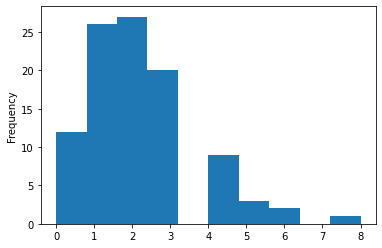

In [11]:
# lambda=2, 푸아송 분포를 따르는 난수 100개 생성
# 예를 들어 1분당 평균 2회로 문의 전화가 접수된다면, 이 코드는 100분을 시뮬레이션하여 100분당 문의 전화 횟수를 알려줌

sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

### 2.12.2 지수분포

푸아송 분포에 사용된 람다를 동일하게 사용하여 `사건과 사건 간의 시간 분포`를 모델링할 수 있음
- 고장이 발생하는 시간
- 개별 고객 상담에 소요되는 시간

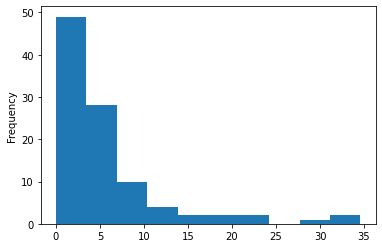

In [12]:
# 주기별 평균 사건 수=0.2인 지수분포에서 난수 100개 생성
# 분당 평균 0.2회 서비스 문의 전화가 걸려오는 경우 100분 동안의 서비스 센터 문의 전화 시뮬레이션

sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

In [13]:
# 푸아송이나 지수분포에 대한 시뮬레이션: 람다가 해당 기간 동안 일정하다는 가정 -> 전반적으로 이는 거의 적절하지 않음
# -> 시간 주기 또는 공간을 일정 기간 충분히 동일하도록(homogeneous) 영역을 잘 나눈다면 괜찮음

### 2.12.3 고장률 추정

많은 경우 사건 발생 비율 람다는 이미 알려져 있거나, 이전 데이터를 통해 추정할 수 있음

하지만 드물게 발생하는 사건(예: 항공기 엔진 고장)의 경우 데이터가 거의 없음 -> 하지만 몇 가지 추측을 할 수 있음 -> 20시간 후에도 아무런 일도 일어나지 않았다면, 시간당 발생률이 1이 아니라는 것은 분명함

### 2.12.4 베이불 분포

사건 발생률이 시간에 따라 지속적으로 변한다면 지수(또는 푸아송)분포는 더는 유용하지 않음 -> 예: 기계 고정 -> 시간이 지날수록 고장 위험은 증가함

`베이불 분포`는 지수분포를 확장한 것 -> 형상(shape) 파라미터 β로 발생률이 달라질 수 있음
- β > 1: 발생률은 시간이 지남에 따라 증가
- β < 1: 감소

베이불 분포는 고장 시간 분석에 사용됨 -> 두 번째 인수는 `특성 수명(척도(scale) 변수)` η임
- 특성 수명:  사용시간 만큼 사용되면 37%가 잔존하고, 63%는 이미 한 번 이상 고장을 경험한 것이 된다. 여기서 37%가 잔존하는 시간(63%가 고장이 나는 시간)을 특성수명이라고 함

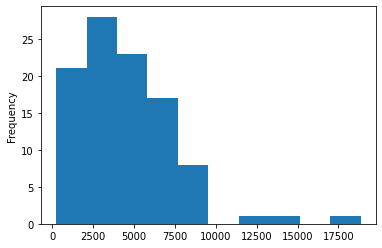

In [14]:
# β=1.5, η=5000인 베이불 분포에서 난수 100개(수명)를 생성

sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()

In [15]:
# 정확한 추정을 위해 -> 임의표본추출의 원칙을 지키는 것이 매우 중요
# 데이터를 무작위로 선택해 주어진 데이터를 그냥 사용하는 것보다
# 편향을 줄이고 질적으로 더 좋은 데이터를 얻을 수 있음

# 다양한 표본추출 및 데이터 생성 분포에 대한 지식을 바탕으로
# 랜덤 변이로 인한 추정치의 잠재적 오차를 정량화할 수 있음

# 동시에 부트스트랩은 표본추정에서 잠재적 오차를 판별할 때 유용하고 모든 문제에 적용 가능한 방법임